<!-- Add CSS Styles. Content starts in the next cell. -->

<!-- Boxes that stand out to catch the readers attention. -->

<style>
.info {
  padding: 20px;
  background-color: #139ed6;
  color: white;
  margin-bottom: 15px;
}

.info:before {
 content: "📝";
}
</style>

# Predicting Future Sales

This notebook contains the process of the data for my submission
to the Kaggle competition ["Predicting Future Sales"](https://www.kaggle.com/c/competitive-data-science-predict-future-sales).

A setup guide for the runtime environment can be found in the projects
[README](./README.adoc) file.

<!-- Table of contents -->

<!-- TODO: add TOC -->

## Prerequisites

### Imports

In [1]:
# Basic packages
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Advanced features
from itertools import product

# Machine learning tools
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# My packages
import src.plotting.Defaults
import src.datacleaning.ConvertingDateValues
from src.util.FunctionExecTime import time_runtime

### Set package options

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

%matplotlib inline
# set the default marker style for all plots
src.plotting.Defaults.set_defaults()

### Import data

In [3]:
# Metadata packages
items = pd.read_csv('data/info/items.csv')
shops = pd.read_csv('data/info/shops.csv')
cats = pd.read_csv('data/info/item_categories.csv')

# Train and test data
train = pd.read_csv('data/technical/sales_train.csv')
test  = pd.read_csv('data/technical/test.csv').set_index('ID')

### Data formatting

In [4]:
train = src.datacleaning.ConvertingDateValues.date_to_month(train)

## Exploratory Data Analysis


### View monthly sales

In [5]:
def view_all_sales():
    # create a new data frame with the relevant columns.
    df = pd.DataFrame(train, columns=['date', 'item_cnt_day'])
    df.set_index('date', inplace=True)

    # sum the values to get a monthly overview
    df = df.groupby(['date']).sum()

    # rename the column to match new output
    df.rename(columns = {'item_cnt_day':'item_cnt_month'}, inplace = True)

    return df

all_sales = time_runtime(view_all_sales)

Runtime: 226ms


<AxesSubplot:xlabel='date'>

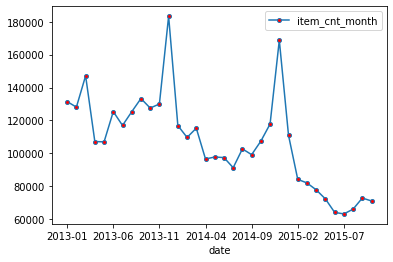

In [6]:
all_sales.plot()

<div class="info">
    We can observe a strong seasonality with spiking end of year sales.
    <br>
    This is particularily noteworthy as the month to predict in question is
    going to be the month of november.
    <br><br>
    Additionally, the trend seems to be going downwards over time.
</div>

### View monthly revenue

In [7]:
def compute_revenue():
    # pick the relevant columns
    df = pd.DataFrame(train, columns=['date', 'item_cnt_day', 'item_price'])
    # calculate the revenue
    df['revenue'] = df.apply(lambda x: x['item_cnt_day'] * x['item_price'], axis=1)
    # drop no longer needed columns
    df.drop(['item_cnt_day', 'item_price'], axis=1, inplace=True)

    # set the index
    df.set_index('date', inplace=True)
    # and regroup the monthly revenue
    return df.groupby(['date']).sum()

revenue = time_runtime(compute_revenue)

Runtime: 19s


<AxesSubplot:xlabel='date'>

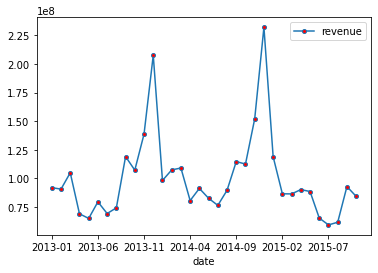

In [8]:
revenue.plot()

<div class="info">
    Fortunately, the revenue is closely correlated to the total sales as
    excpected.
</div>